# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*) 

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded. 


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [1]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1 
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [2]:
df = pd.read_csv("/Users/tomsagasser/Downloads/tmdb_5000_movies TMDL 2024.csv")
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

View information about the dataset including datatypes and null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

homepage with 3091 null values (4803 - 1712), cannot estimate, maybe replace null values with "No homepage"

overview with 3 null values (4803 - 4800), fill in movie desciptions from other sources (i.e. wikipedia)

release_date with 1 null value (4803 - 4802), look up release date through simple web search. if non-existent, keep blank

runtime with 2 null values (4803 - 4801), estimate with avg runtime of all movies or all movies of that genre

tagline with 844 null values (4803 - 3959), most likely best to leave as null values as estimates are not useful

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [6]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [7]:
df = df.dropna(subset=['overview'])# drop na values
df = df.reset_index(drop=True) # reset index

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [165]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    label_index = unique_labels.index(label)
    out[label_index] = 1
    return out


processed_genres = [process_genre_string(gs) for gs in df['genres']]

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

df["proc_genres"] = processed_genres

encoded_labels = []
for genre in tqdm(df["proc_genres"], total=len(df)):
    encoded_labels.append(encode_labels(genre, unique_genres))

df["one_hot_genres"] = encoded_labels

100%|███████████████████████████████████| 4707/4707 [00:00<00:00, 425587.72it/s]


Verify that one-hot encodings are indeed as expected

In [15]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [16]:
df["one_hot_genres"][1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

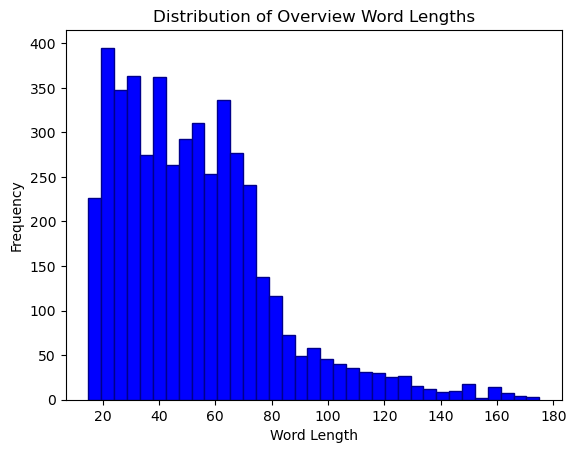

In [58]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column

for overview in df['overview']:
    processed_text = remove_punctuation(overview.lower())
    processed_overviews.append(processed_text)
df["proc_overview"] = processed_overviews


# get the word lengths of each overview and store it in a list 
overview_lens = []
for processed_text in df['proc_overview']:
    word_count = len(processed_text.split())
    overview_lens.append(word_count)
df["overview_len"] = overview_lens


plt.hist(df["overview_len"], bins=35, edgecolor = "darkblue", color = "blue")
plt.title('Distribution of Overview Word Lengths')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

In [35]:
print(min(overview_lens),max(overview_lens))

0 175


the shortest overview has 0 words and the longest has 175 words.

i would choose 20-80 words as my range

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [75]:
token_len = 15 # number of words
df = df[df['overview_len'] >= token_len]

# split each proc_overview into a list of words, select the first token_len words, 
# and add the list of words back into df["proc_overview"]
truncated_overviews = []
for overview in df['proc_overview']:
    words = overview.split()
    first_fifteen_words = words[:token_len]
    truncated_overview = ' '.join(first_fifteen_words)
    truncated_overviews.append(truncated_overview)

df['proc_overview'] = truncated_overviews


overview_lens = []
for processed_text in df['proc_overview']:
    word_count = len(processed_text.split()) 
    overview_lens.append(word_count)
df["overview_len"] = overview_lens
df["overview_len"]


# print to verify
df[["title","proc_overview","overview_len"]]

,title,proc_overview,overview_len
0,Avatar,in the 22nd century a paraplegic marine is dis...,15
1,Pirates of the Caribbean: At World's End,captain barbossa long believed to be dead has ...,15
2,Spectre,a cryptic message from bonds past sends him on...,15
3,The Dark Knight Rises,following the death of district attorney harve...,15
4,John Carter,john carter is a warweary former military capt...,15
...,...,...,...
4794,Cavite,adam a security guard travels from california ...,15
4795,El Mariachi,el mariachi just wants to play his guitar and ...,15
4797,"Signed, Sealed, Delivered",signed sealed delivered introduces a dedicated...,15
4798,Shanghai Calling,when ambitious new york attorney sam is sent t...,15


0       15
1       15
2       15
3       15
4       15
        ..
4794    15
4795    15
4797    15
4798    15
4799    15
Name: overview_len, Length: 4707, dtype: int64

### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [46]:
# hint: store all words for all movies in a set, change it to a list and sort

unique_words = set()


for overview in df['proc_overview']:
    words = overview.split()
    unique_words.update(words)

# Convert the set to a list and sort it to create a sorted vocabulary
sorted_vocab = sorted(list(unique_words))
vocab_len = len(sorted_vocab)
print(vocab_len) 

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [48]:
def encode_word(word, vocab):
    """ Encodes a single word into a one-hot vector based on the vocabulary. """
    encoding = np.zeros(len(vocab))
    # Find the index of the word in the vocabulary
    if word in vocab:
        index = vocab.index(word)
        encoding[index] = 1
    return encoding

encoded_labels = []

for index, row in tqdm(df.iterrows(), total=len(df)):
    overview_encoding = np.zeros(len(sorted_vocab))
    words = row["proc_overview"].split()
    for word in words:
        word_encoding = encode_word(word, sorted_vocab)
        overview_encoding += word_encoding
    encoded_labels.append(overview_encoding)

df["one_hot_overview"] = encoded_labels
print(df['one_hot_overview'].head())

100%|██████████████████████████████████████| 4707/4707 [00:14<00:00, 318.44it/s]

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: one_hot_overview, dtype: object


In [ ]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(...) # get encoding for this word
    sentence_encode = ... # sum over axis=1
    encoded_labels.append(...)

df["one_hot_overview"] = ...
df['one_hot_overview'] # print to verify

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

In [49]:
len(df) * len(sorted_vocab) * 16

940872816

940872816 bytes


# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

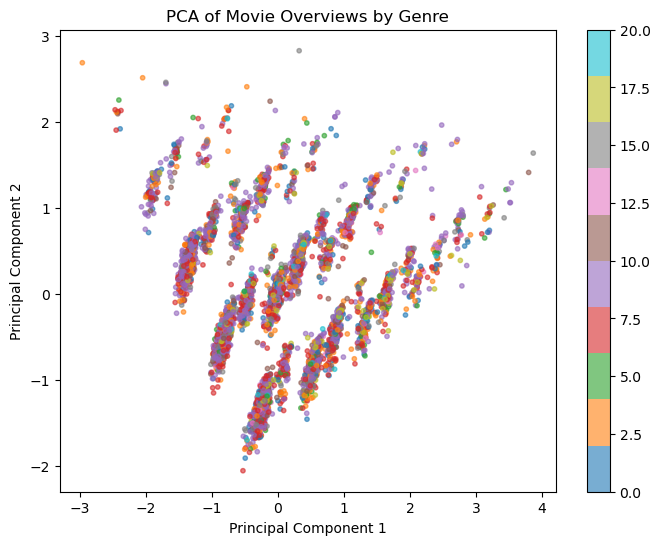

In [77]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
overview_list = df["one_hot_overview"].tolist()
overview_pca = pca.fit_transform(overview_list)

# Convert genres to numerical labels
genre_labels = pd.factorize(df['proc_genres'])[0]

plt.figure(figsize=(8, 6))
scatter = plt.scatter(overview_pca[:, 0], overview_pca[:, 1], c=genre_labels, cmap='tab10', alpha=0.6, s=10)

plt.colorbar(scatter)

plt.title('PCA of Movie Overviews by Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

no the color schemes are still random. there is no clear clustering of genres.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

we lose 1- power(1) - power(2) = 0.8871154913246593 (see 3.4 code)

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

[1.01854465 0.62590463 0.33997931 0.31617204 0.28776525 0.27668847
 0.22208819 0.20243136 0.14788051 0.13600649 0.12058035 0.10896512
 0.10588738 0.09981802 0.09386304 0.08682492 0.08427183 0.07985628
 0.07494276 0.07054143 0.06841094 0.06707131 0.06397224 0.06262159
 0.06057622 0.05548664 0.05487708 0.05060571 0.04986611 0.046358
 0.0457026  0.04100223 0.03787531 0.03760757 0.03648219 0.03578264
 0.03286913 0.03242965 0.03202784 0.03151303 0.03078459 0.02918319
 0.02864857 0.02857489 0.02753132 0.02695218 0.02680016 0.02630914
 0.02569836 0.02503024]
[0.0699188  0.04296571 0.02333815 0.02170388 0.01975387 0.0189935
 0.01524542 0.01389606 0.01015137 0.00933627 0.00827733 0.00748
 0.00726872 0.00685209 0.0064433  0.00596016 0.00578491 0.0054818
 0.0051445  0.00484237 0.00469612 0.00460416 0.00439142 0.00429871
 0.0041583  0.00380892 0.00376708 0.00347387 0.0034231  0.00318228
 0.00313729 0.00281463 0.00259998 0.0025816  0.00250435 0.00245633
 0.00225633 0.00222616 0.00219858 0.00216324 

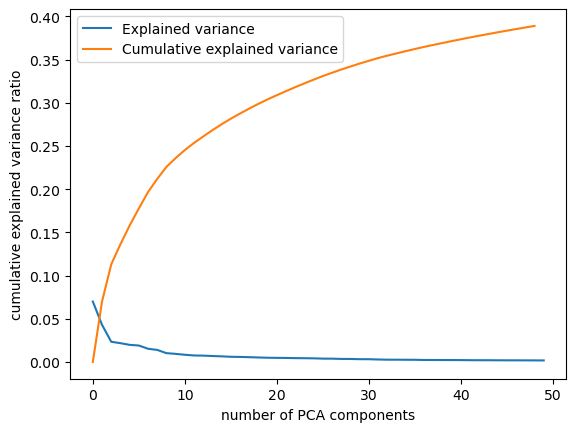

0.8871154913246596


In [119]:
pca = PCA(n_components=50)  # Set the desired number of components
# perform covariance matrix computation
# and eigendecomposition
overview_asa_list = pca.fit(overview_list)

print(pca.explained_variance_)

powers = pca.explained_variance_ratio_
print(powers[:50])
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.xlabel("number of PCA components")
plt.ylabel("cumulative explained variance ratio")
plt.show()

# for 3.3
two_d_loss = 1 - powers[0] - powers[1]
print(two_d_loss)

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [121]:
pca_x = PCA(n_components=2500)  # Set the desired number of components
# perform covariance matrix computation
# and eigendecomposition
overview_asa_list = pca_x.fit(overview_list)

print(pca_x.explained_variance_)

powers = pca_x.explained_variance_ratio_
print(powers[:50])

[1.01854465e+00 6.25904633e-01 3.39979306e-01 ... 8.27828957e-04
 8.25740952e-04 8.24086680e-04]
[0.0699188  0.04296571 0.02333815 0.02170388 0.01975387 0.0189935
 0.01524542 0.01389606 0.01015137 0.00933627 0.00827733 0.00748
 0.00726872 0.00685209 0.0064433  0.00596016 0.00578491 0.0054818
 0.0051445  0.00484237 0.00469612 0.00460416 0.00439142 0.00429871
 0.0041583  0.00380892 0.00376709 0.00347387 0.0034231  0.00318229
 0.00313731 0.00281467 0.0026001  0.00258184 0.00250475 0.00245662
 0.00225737 0.00222695 0.00220013 0.00216662 0.00211463 0.00200716
 0.00197778 0.00196672 0.00189575 0.00186191 0.00185055 0.00181888
 0.00177807 0.0017357 ]


In [124]:
cumulative_variance = np.cumsum(powers)


num_components = np.where(cumulative_variance >= 0.80)[0][0] + 1
num_components

1227

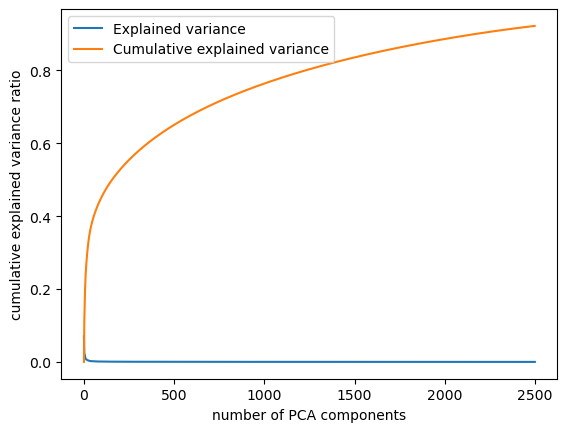

In [123]:
#graph it
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.xlabel("number of PCA components")
plt.ylabel("cumulative explained variance ratio")
plt.show()

*Your text answer here*

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [125]:
n_dims = num_components #1227
pca = PCA(n_components=n_dims)
labels_pca = pca.fit_transform(overview_list)
df["overview_pca"] = list(labels_pca)
print(df[["title", "overview_pca"]].head())

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                        overview_pca  
0  [0.17130556275132378, 1.2545637565425891, 1.06...  
1  [-0.3780729300588893, -1.5934718497724465, 0.9...  
2  [-1.9128810490622827, 1.1768562611977436, 0.80...  
3  [0.8229543741730715, -0.4484862837329668, 0.59...  
4  [-0.10117960365991915, -0.22882078000644418, 0...  


# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [130]:
from sklearn.cluster import KMeans

K = 20

kmeans = KMeans(n_clusters=K, random_state=0)

pca_aslist = list(df['overview_pca'])
kmeans.fit(pca_aslist)

y_preds = kmeans.predict(pca_aslist)

df["cluster_kmeans"] = y_preds

cluster_0_elements = df[df["cluster_kmeans"] == 0]
print(cluster_0_elements)


/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                    title  \
27                             Battleship   
50    Prince of Persia: The Sands of Time   
87                           Tomorrowland   
118                           Ratatouille   
165                                  Hulk   
...                                   ...   
4703                        The Horse Boy   
4712                    Sound of My Voice   
4724                         Penitentiary   
4759                    George Washington   
4767                  Mutual Appreciation   

                                               overview  \
27    When mankind beams a radio signal into space, ...   
50    A rogue prince reluctantly joins forces with a...   
87    Bound by a shared destiny, a bright, optimisti...   
118   A rat named Remy dreams of becoming a great Fr...   
165   Bruce Banner, a genetics researcher with a tra...   
...                                                 ...   
4703  Filmmaker Michel Orion Scott captures a 

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

it is not good clustering as a lot of random movies of different genres are clustered together. a few movies (adventure movies for example) are grouped together but also with documentaries and dramas

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

there is no clear elbow. for a range of 30, we can see this clearly

/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

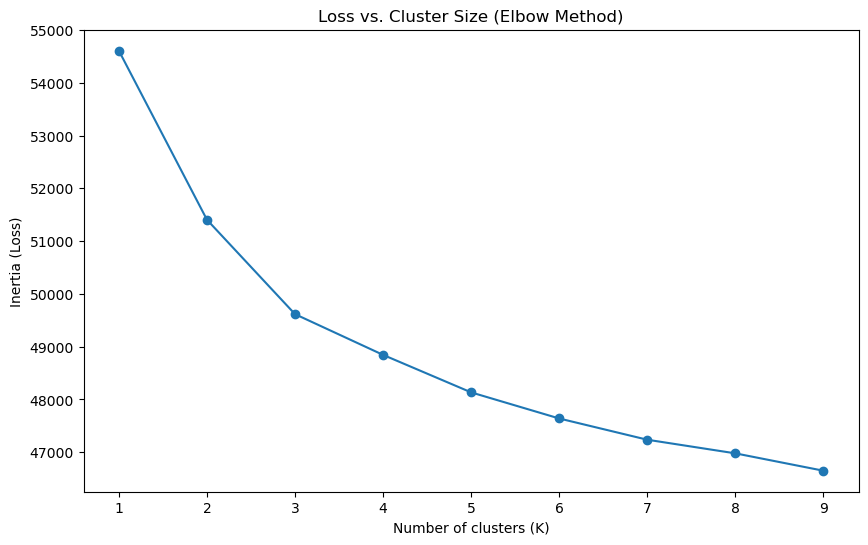

In [132]:
K_values = range(1, 31)

inertias = []

for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=0).fit(pca_aslist)
    inertias.append(kmeans.inertia_)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, inertias, '-o')
plt.title('Loss vs. Cluster Size (Elbow Method)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Loss)')
plt.xticks(K_values)
plt.show()


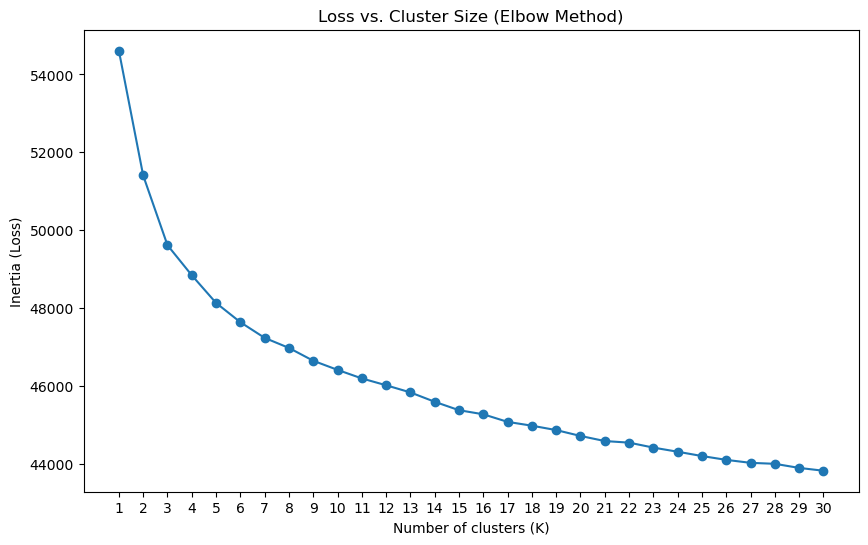

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [134]:
from sklearn.mixture import GaussianMixture

K = 20

gmm = GaussianMixture(n_components=K, random_state=0)

gmm.fit(pca_aslist)

cluster_gmm = gmm.predict(pca_aslist)

df["cluster_gmm"] = cluster_gmm

#Print cluster 
chosen_cluster = 1
cluster_elements = df[df["cluster_gmm"] == chosen_cluster]
print(cluster_elements)


                                           title  \
3                          The Dark Knight Rises   
9             Batman v Superman: Dawn of Justice   
11                             Quantum of Solace   
12    Pirates of the Caribbean: Dead Man's Chest   
28                                Jurassic World   
...                                          ...   
4757                       This Is Martin Bonner   
4768           Her Cry: La Llorona Investigation   
4782                        Stories of Our Lives   
4793                                      Primer   
4797                   Signed, Sealed, Delivered   

                                               overview  \
3     Following the death of District Attorney Harve...   
9     Fearing the actions of a god-like Super Hero l...   
11    Quantum of Solace continues the adventures of ...   
12    Captain Jack Sparrow works his way out of a bl...   
28    Twenty-two years after the events of Jurassic ...   
...                  

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

This is already a lot better than before. We now have more focus on action and adventure movies in cluster 1. meaning that they are clustered a bit more. there is still less fitting genres included, but for instance The Dark Knight Rises and Batman v Superman: Dawn of Justice are in the same cluster now.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

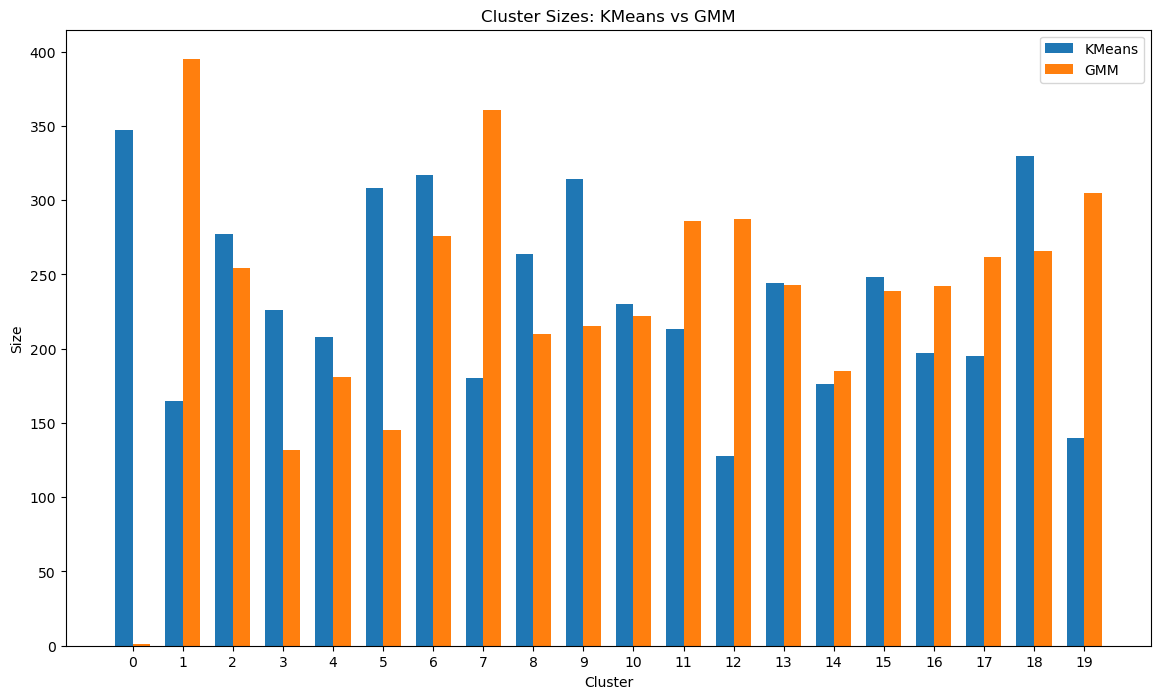

235.35 235.35


In [140]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend

kmeans_cluster_sizes = df['cluster_kmeans'].value_counts().sort_index()
gmm_cluster_sizes = df['cluster_gmm'].value_counts().sort_index()

# Ensure both series have the same shape 
all_clusters = sorted(set(kmeans_cluster_sizes.index) | set(gmm_cluster_sizes.index))
kmeans_cluster_sizes = kmeans_cluster_sizes.reindex(all_clusters, fill_value=0)
gmm_cluster_sizes = gmm_cluster_sizes.reindex(all_clusters, fill_value=0)

x = np.arange(len(all_clusters))

bar_width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
kmeans_bars = ax.bar(x - bar_width/2, kmeans_cluster_sizes, bar_width, label='KMeans')
gmm_bars = ax.bar(x + bar_width/2, gmm_cluster_sizes, bar_width, label='GMM')

ax.set_xlabel('Cluster')
ax.set_ylabel('Size')
ax.set_title('Cluster Sizes: KMeans vs GMM')
ax.set_xticks(x)
ax.set_xticklabels(all_clusters)
ax.legend()

plt.show()
print(kmeans_cluster_sizes.mean(),gmm_cluster_sizes.mean())

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

the clusters look pretty similarily distributed. GMM is slightly more uniform in my opinion. Maybe because it is more efficient in clustering properly.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [164]:
prev_watch = "Avatar"
max_recom = 20

# Find the cluster index for Avatar in both KMeans and GMM clustering
cluster_kmeans = df[df['title'] == prev_watch]['cluster_kmeans'].iloc[0]
cluster_gmm= df[df['title'] == prev_watch]['cluster_gmm'].iloc[0]

kmeans_recommendations = df[df['cluster_kmeans'] == cluster_kmeans]['title'].tolist()

gmm_recommendations = df[df['cluster_gmm'] == cluster_gmm]['title'].tolist()

print(f"Movies similar to {prev_watch} based on KMeans clustering:")
for movie in kmeans_recommendations[:max_recom+1]:
     if movie != prev_watch:  # Exclude Avatar 
        print(movie)

print(f"\nMovies similar to {prev_watch} based on GMM clustering:")
for movie in gmm_recommendations[:max_recom+1]:
    if movie != prev_watch: 
        print(movie)

Movies similar to Avatar based on KMeans clustering:
Waterworld
The Jungle Book
Shin Godzilla
Poseidon
Charlie and the Chocolate Factory
Angels & Demons
The Revenant
R.I.P.D.
Pirates of the Caribbean: The Curse of the Black Pearl
San Andreas
Django Unchained
Cloud Atlas
The Fifth Element
Mulan
Bicentennial Man
Volcano
Conan the Barbarian
Safe House
Tower Heist
Dredd

Movies similar to Avatar based on GMM clustering:
Iron Man 3
Transformers: Revenge of the Fallen
Jack the Giant Slayer
Brave
Jupiter Ascending
Poseidon
I Am Legend
Flushed Away
Sahara
Happy Feet Two
The BFG
RoboCop
Speed Racer
Star Wars: Episode I - The Phantom Menace
The Croods
Tomorrow Never Dies
Real Steel
Minority Report
True Lies
Rise of the Planet of the Apes


**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

in my opinion both are partially good. they have outliers (movies that do not fit) and good recommendations as well. overall i would use it but with care

**Q6.3** How would you try making the recommender systems better?

by increasing the length of the overview we are looking at. instead of just looking at the first 15 words i would focus on key words in the overviews and exclude irrelevant words (a, the, etc.)

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

base the clustering on multiple previous watched movies and redoing the clustering to get different versions of movie recommendations

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [155]:
from sklearn.metrics.pairwise import cosine_similarity

def cosine_sim(v1, v2):
    
    v1, v2 = np.array(v1).reshape(1, -1), np.array(v2).reshape(1, -1)
    
    return cosine_similarity(v1, v2)[0][0]

# Get the PCA encoding of the previously watched film "Avatar"
prev_watch_enc = df[df['title'] == "Avatar"]['overview_pca'].iloc[0]

# Calculate cosine similarities with the encoding of "Avatar" for all movies
sims = []
for _, row in df.iterrows():
    sim = cosine_sim(prev_watch_enc, row['overview_pca'])
    sims.append(sim)

df["cos_sim_to_avatar"] = sims

# Sort the DataFrame based on the similarity scores in descending order
df_sorted_by_similarity = df.sort_values(by="cos_sim_to_avatar", ascending=False)

print(df_sorted_by_similarity[['title', 'cos_sim_to_avatar']].head(6))

recommendations = df_sorted_by_similarity[df_sorted_by_similarity['title'] != "Avatar"]['title'].head(5)
print("\nRecommended Movies based on Cosine Similarity to 'Avatar':")
for title in recommendations:
    print(title)


                   title  cos_sim_to_avatar
0                 Avatar           1.000000
3363             Warlock           0.525178
3778              Zipper           0.477925
1285  Nomad: The Warrior           0.471296
415                Dredd           0.459691
2935        Barry Lyndon           0.445668

Recommended Movies based on Cosine Similarity to 'Avatar':
Warlock
Zipper
Nomad: The Warrior
Dredd
Barry Lyndon


As i do not know these movies i am not sure if the recommendations are better. However seeing as the model is more complex i am assuming that the predictions for similar movies are better

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [156]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


In [158]:
df_train


,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len,one_hot_overview,overview_pca,cluster_kmeans,cluster_gmm,cos_sim_to_avatar
0,Sex Tape,"When Jay and Annie first got together, their r...","[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",when jay and annie first got together their ro...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.17759327117400944, -1.3345930121278589, -0...",9,17,-0.244874
1,Kiss the Girls,Forensic psychologist Alex Cross travels to No...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",forensic psychologist alex cross travels to no...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.3035357664704101, -1.400787293478349, 0.10...",9,17,-0.180146
2,Juliet and Alfa Romeo,"Tilen (18), an attractive high school student,...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",tilen 18 an attractive high school student swe...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5180376645579564, -0.8156105025430274, 0.69...",1,14,0.025574
3,Red State,"Set in Middle America, a group of teens receiv...","[{""id"": 27, ""name"": ""Horror""}, {""id"": 28, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",set in middle america a group of teens receive...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.37299993432051504, 0.1406679079129115, -0....",4,9,-0.123551
4,Road House,"The Double Deuce is the meanest, loudest and r...","[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",the double deuce is the meanest loudest and ro...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.379489442297968, 0.2926753181425293, -0.208...",19,3,0.140616
...,...,...,...,...,...,...,...,...,...,...,...,...
3760,Eddie the Eagle,"Inspired by true events, Eddie the Eagle is a ...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",History,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",inspired by true events eddie the eagle is a f...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.08892506492029345, 0.2492590610115094, 0.18...",3,15,0.069234
3761,Savva. Heart of the Warrior,A fairytale about a grand life journey of a 10...,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",a fairytale about a grand life journey of a 10...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-1.6125551101826299, 1.5253392714817378, 0.46...",15,8,0.115062
3762,Grown Ups,After their high school basketball coach passe...,"[{""id"": 35, ""name"": ""Comedy""}]",Comedy,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",after their high school basketball coach passe...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.2046542840318538, -1.3027234560877594, -0....",9,17,-0.240840
3763,Out of the Blue,Dennis Hopper is a hard-drinking truck driver ...,"[{""id"": 18, ""name"": ""Drama""}]",Drama,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",dennis hopper is a harddrinking truck driver w...,15,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2643746689646788, 0.3885646234467267, -0.01...",6,15,0.005606


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [163]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

def train_and_eval(model, train_X, train_y, test_X, test_y):
    # Training time
    start = perf_counter()
    model.fit(train_X, train_y)
    end = perf_counter()
    fit_time = (end - start) / len(train_X)

    start = perf_counter()
    train_score = model.score(train_X, train_y)
    end = perf_counter()
    train_score_time = (end - start) / len(train_X)

    start = perf_counter()
    test_score = model.score(test_X, test_y)
    end = perf_counter()
    test_score_time = (end - start) / len(test_X)

    return train_score, test_score, fit_time, train_score_time, test_score_time


pca = PCA(n_components=50) 
train_overview_pca = pca.fit_transform(df_train['one_hot_overview'].tolist())  
test_overview_pca = pca.transform(df_test['one_hot_overview'].tolist()) 


label_encoder = LabelEncoder()
train_genres_encoded = label_encoder.fit_transform(df_train['proc_genres'])
test_genres_encoded = label_encoder.transform(df_test['proc_genres']) 


model = MLPClassifier(random_state=42, max_iter=300)
parameters = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
}


grid_search = GridSearchCV(model, parameters, cv=3)
grid_search.fit(train_overview_pca, train_genres_encoded)

best_model = grid_search.best_estimator_

train_score, test_score, fit_time, train_score_time, test_score_time = train_and_eval(
    best_model,
    train_overview_pca,
    train_genres_encoded,
    test_overview_pca,
    test_genres_encoded
)

print(f"Train Score: {train_score}, Test Score: {test_score}")
print(f"Mean Training Time: {fit_time}s, Mean Train Score Time: {train_score_time}s, Mean Test Score Time: {test_score_time}s")

/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/tomsagasser/anaconda3/lib/python3.11/site-p

Train Score: 0.4047808764940239, Test Score: 0.19851380042462846
Mean Training Time: 0.0010638120310737568s, Mean Train Score Time: 1.2927702533768845e-06s, Mean Test Score Time: 2.109008487027273e-06s


/Users/tomsagasser/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

When selecting what model to use, i decided to try the new MLP classifier, as it seemed decently efficient to implement. I used PCA as it is efficient and it reduces the dimensionality of the OH encoded overviews. I selected 50 compontents to not overwhelm the model with too much data, however this could of course be increased by a lot depending on your goal. To tune the MLP model, i found a simple explanation, where i had to use the size of hidden layers and the alpha for regularization as my hyper parameters. To improve the model, you could make it more complex and make it work with more data by increassing the number of hyperparameters for the grid search or increasing the number of iterations and PCA components.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)